In [2]:
!pip install tensorflow opencv-python matplotlib


   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/39.5 MB ? eta -:--:--
    --------------------------------------- 0.8/39.5 MB 2.6 MB/s eta 0:00:15
   - -------------------------------------- 1.6/39.5 MB 2.9 MB/s eta 0:00:14
   -- ------------------------------------- 2.1/39.5 MB 2.7 MB/s eta 0:00:14
   -- ------------------------------------- 2.6/39.5 MB 2.8 MB/s eta 0:00:14
   --- ------------------------------------ 3.1/39.5 MB 2.7 MB/s eta 0:00:14
   --- ------------------------------------ 3.9/39.5 MB 2.8 MB/s eta 0:00:13
   ---- ----------------------------------- 4.5/39.5 MB 2.8 MB/s eta 0:00:13
   ----- ---------------------------------- 5.2/39.5 MB 2.8 MB/s eta 0:00:13
   ----- ---------------------------------- 5.8/39.5 MB 2.8 MB/s eta 0:00:12
   ------ --------------------------------- 6.3/39.5 MB 2.9 MB/s eta 0:00:12
   ------ --------------------------------- 6.8/39.5 MB 2.8 MB/s eta 0:00:12
   ------- --

In [3]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.2.2
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.3
anaconda-project                  0.11.1
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy          

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

C:\Users\sunnr\AppData\Local\Temp\ipykernel_21628\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [9]:
data_dir = 'data' 


In [10]:
image_exts = ['jpeg','jpg', 'bmp', 'png']


In [11]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
data = tf.keras.utils.image_dataset_from_directory('data')


Found 305 files belonging to 2 classes.


In [14]:
data_iterator = data.as_numpy_iterator()


In [15]:
batch = data_iterator.next()


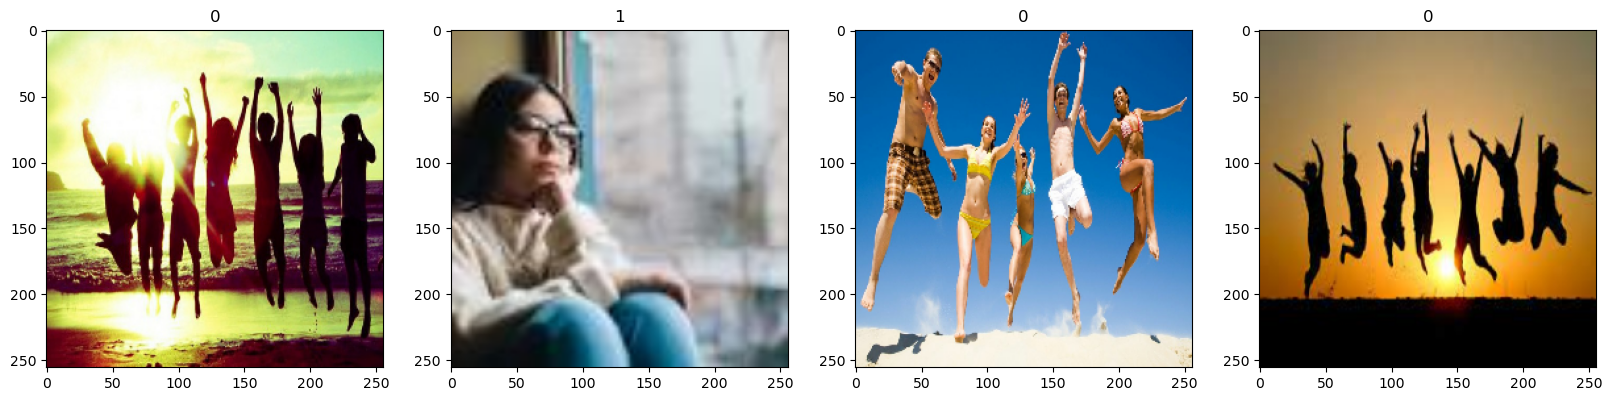

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
data = data.map(lambda x,y: (x/255, y))


In [18]:
data.as_numpy_iterator().next()


(array([[[[0.8435049 , 0.83958334, 0.82389706],
          [0.7693321 , 0.76541054, 0.74972427],
          [0.8151808 , 0.8112592 , 0.79557294],
          ...,
          [0.65580577, 0.6518842 , 0.6361979 ],
          [0.7868413 , 0.7829197 , 0.76723343],
          [0.7679075 , 0.76398593, 0.74829966]],
 
         [[0.81308246, 0.8091609 , 0.7934746 ],
          [0.7804075 , 0.7764859 , 0.76079965],
          [0.81432784, 0.81040627, 0.79472   ],
          ...,
          [0.6722369 , 0.66831535, 0.6526291 ],
          [0.7754287 , 0.77150714, 0.7558209 ],
          [0.7604225 , 0.75650096, 0.7408147 ]],
 
         [[0.77562505, 0.7717035 , 0.7560172 ],
          [0.79433244, 0.7904109 , 0.7747246 ],
          [0.81433153, 0.81040996, 0.7947237 ],
          ...,
          [0.68921304, 0.68529147, 0.6696052 ],
          [0.7567718 , 0.75285023, 0.73716396],
          [0.74962735, 0.7457058 , 0.7300195 ]],
 
         ...,
 
         [[0.9724193 , 0.96849775, 0.9528115 ],
          [0.94128

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train_size

7

In [21]:
val_size

2

In [23]:
test_size

1

In [24]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)


In [25]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [27]:
model = Sequential()

In [28]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\ProgramData\New folder\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [30]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
logdir='logs'


In [32]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [33]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])


Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 760ms/step - accuracy: 0.5782 - loss: 1.3126 - val_accuracy: 0.6406 - val_loss: 0.6109
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 650ms/step - accuracy: 0.6059 - loss: 0.6484 - val_accuracy: 0.8281 - val_loss: 0.5862
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 593ms/step - accuracy: 0.7446 - loss: 0.6001 - val_accuracy: 0.8281 - val_loss: 0.4234
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 535ms/step - accuracy: 0.8148 - loss: 0.4824 - val_accuracy: 0.9375 - val_loss: 0.3472
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 556ms/step - accuracy: 0.8492 - loss: 0.4052 - val_accuracy: 0.8594 - val_loss: 0.3433
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 588ms/step - accuracy: 0.8577 - loss: 0.3405 - val_accuracy: 0.9219 - val_loss: 0.2652
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 516ms/step - accuracy: 0.9316 - loss: 0.2350 - val_accuracy: 0.9062 - val_loss: 0.2265
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 590ms/step - accuracy: 0.8909 - loss: 0.2568 - val_accuracy: 0.9219 - val_loss

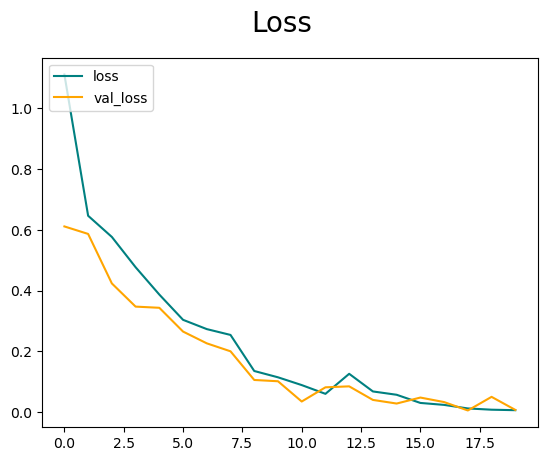

In [34]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

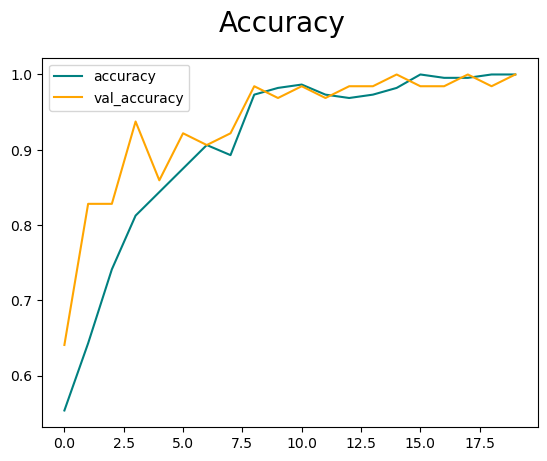

In [35]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [36]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [37]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [38]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step


In [39]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [40]:
import cv2


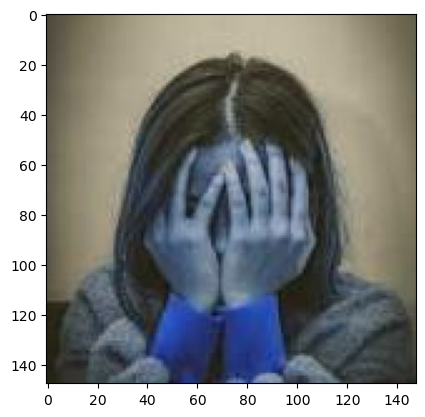

In [41]:
img = cv2.imread('sad.jpg')
plt.imshow(img)
plt.show()

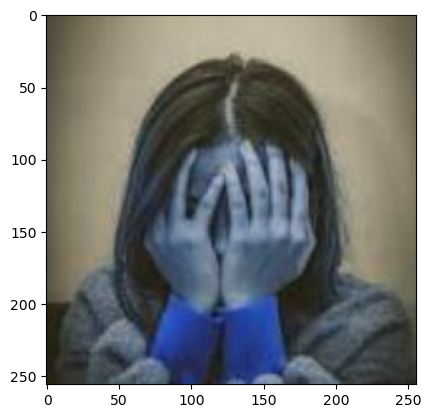

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 578ms/step


In [44]:
yhat


array([[0.95372003]], dtype=float32)

In [45]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [46]:
from tensorflow.keras.models import load_model

In [47]:

model.save(os.path.join('models','imageclassifier.h5'))

In [50]:
from keras.models import load_model

new_model = load_model('models/imageclassifier.h5')


In [51]:
new_model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


array([[0.95372003]], dtype=float32)

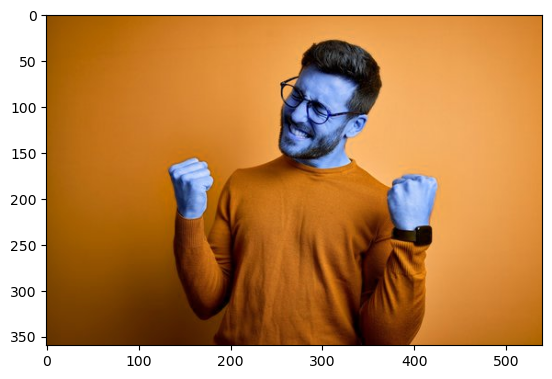

In [52]:
img = cv2.imread('happy.jpg')
plt.imshow(img)
plt.show()

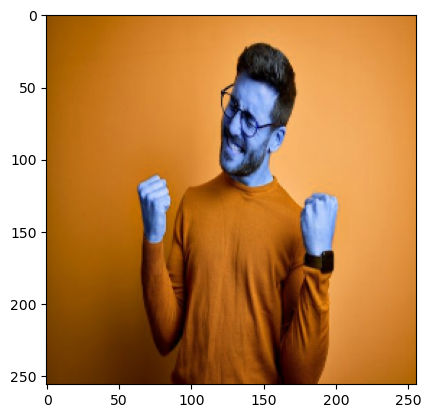

In [53]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
yhat1 = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


In [57]:
yhat1

array([[1.1899477e-07]], dtype=float32)

In [58]:
if yhat1 > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
